# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Mateo Podesta y Marco Gregorio ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [522]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from datetime import date, timedelta

In [523]:
# Solution
response_bcrp = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39563DA/json/1922/2022")
response_bcrp.status_code

200

In [524]:
response_bcrp.json().keys()

dict_keys(['config', 'periods'])

In [525]:
bcrp_data = pd.DataFrame(response_bcrp.json()["periods"])
bcrp_data #values are coded as a lenght 1 array

,name,values
0,1922,[14122.0322219965]
1,1923,[14756.217373401]
2,1924,[16069.7988061845]
3,1925,[16575.1994730273]
4,1926,[18130.1930941889]
...,...,...
95,2017,[514215]
96,2018,[534665]
97,2019,[546605]
98,2020,[486402.0862783]


In [526]:
bcrp_data["values"] = bcrp_data["values"].apply(lambda x: x[0])
bcrp_data["values"] = pd.to_numeric(bcrp_data["values"])

In [527]:
#Add the 2022 values
bcrp_data.loc[len(bcrp_data)] = [2022, 567390]
#there is no values for Peru's gdp on 2023
bcrp_data

,name,values
0,1922,14122.032222
1,1923,14756.217373
2,1924,16069.798806
3,1925,16575.199473
4,1926,18130.193094
...,...,...
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278
99,2021,552312.155430


In [528]:
bcrp_data["growth"] = bcrp_data["values"].pct_change().mul(100).round(2) 
bcrp_data #the data is ready to be graphed

,name,values,growth
0,1922,14122.032222,NaN
1,1923,14756.217373,4.49
2,1924,16069.798806,8.90
3,1925,16575.199473,3.15
4,1926,18130.193094,9.38
...,...,...,...
96,2018,534665.000000,3.98
97,2019,546605.000000,2.23
98,2020,486402.086278,-11.01
99,2021,552312.155430,13.55


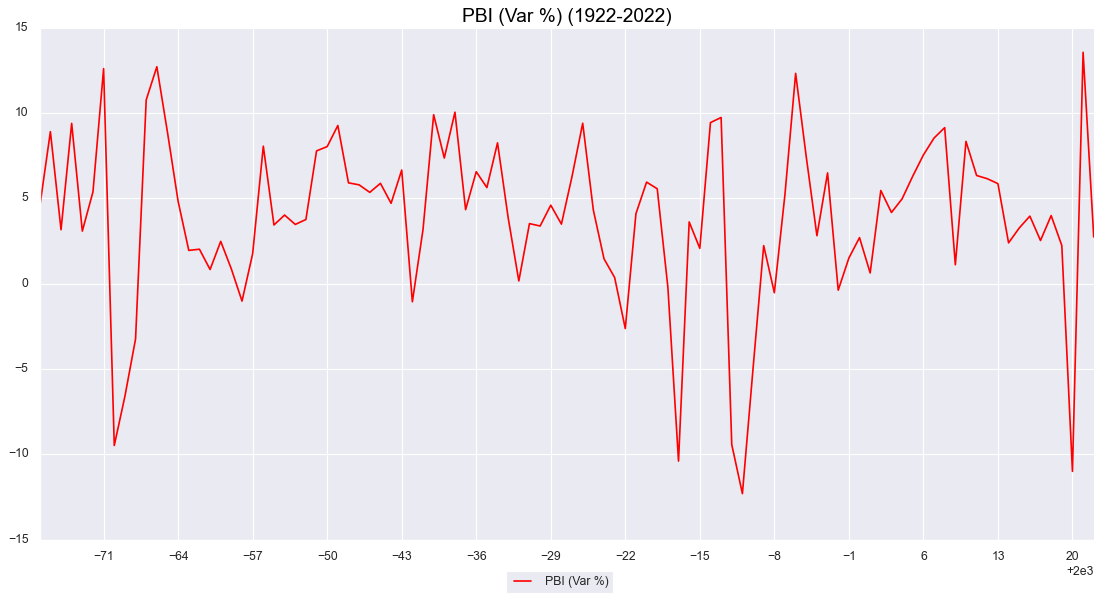

In [529]:
plt.figure(figsize=(17,8))
plt.plot(bcrp_data["name"].astype(np.float16), bcrp_data["growth"].astype(np.float16),color='red')
sns.despine()
plt.grid(True)
plt.title("PBI (Var %) (1922-2022)",size='x-large',color='black')
plt.xticks(np.arange(1922, 2022, 7.0))
plt.legend(["PBI (Var %)"], bbox_to_anchor =(0.55, -0.05))
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [539]:
# Solution
response_bcrp2 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2014-1/2022-10/ing")
response_bcrp2.status_code

200

In [531]:
response_bcrp2.json().keys()

dict_keys(['config', 'periods'])

In [532]:
bcrp_data2 = pd.DataFrame(response_bcrp2.json()["periods"])
bcrp_data2 #values are coded as a lenght 1 array

,name,values
0,Jul.2014,[147.922643157663]
1,Aug.2014,[145.595315365279]
2,Sep.2014,[147.301851243689]
3,Oct.2014,[150.790042907709]
4,Nov.2014,[147.601135020437]
...,...,...
95,Jun.2022,[178.292131143719]
96,Jul.2022,[177.607762415235]
97,Aug.2022,[178.999270679373]
98,Sep.2022,[182.333593279657]


In [533]:
bcrp_data2["values"] = bcrp_data2["values"].apply(lambda x: x[0])
bcrp_data2["values"] = pd.to_numeric(bcrp_data2["values"])
bcrp_data2

,name,values
0,Jul.2014,147.922643
1,Aug.2014,145.595315
2,Sep.2014,147.301851
3,Oct.2014,150.790043
4,Nov.2014,147.601135
...,...,...
95,Jun.2022,178.292131
96,Jul.2022,177.607762
97,Aug.2022,178.999271
98,Sep.2022,182.333593


In [534]:
bcrp_data2["rolling_mean"] = bcrp_data2["values"].rolling(window=12).mean()
bcrp_data2 = bcrp_data2.dropna()
bcrp_data2

,name,values,rolling_mean
11,Jun.2015,150.578547,147.997462
12,Jul.2015,153.252909,148.441651
13,Aug.2015,149.481867,148.765530
14,Sep.2015,151.999229,149.156979
15,Oct.2015,155.730121,149.568652
...,...,...,...
95,Jun.2022,178.292131,175.780411
96,Jul.2022,177.607762,176.042479
97,Aug.2022,178.999271,176.331272
98,Sep.2022,182.333593,176.649618


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2168\1775803024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bcrp_data2['name'] = pd.to_datetime(bcrp_data2['name'], format='%b.%Y', errors='coerce')


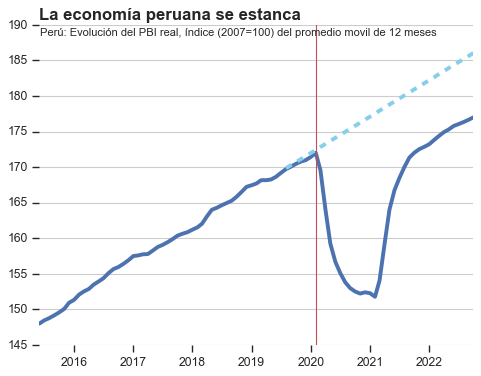

In [541]:
#Code adapted from stack overflow

bcrp_data2['name'] = pd.to_datetime(bcrp_data2['name'], format='%b.%Y', errors='coerce')


filtered_data = bcrp_data2[bcrp_data2['name'] <= 'Feb.2020']

# Prepare matrices for linear regression
X = np.column_stack((np.ones(len(filtered_data)), np.arange(1, len(filtered_data)+1)))
y = filtered_data['rolling_mean']

# Calculate coefficients (beta)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

X2 = np.column_stack((np.ones(len(bcrp_data2)), np.arange(1, len(bcrp_data2)+1)))
predicted_values = X2 @ beta
predicted_values = predicted_values[50:]

# Plotting
plt.figure(figsize=(7,5))

plt.plot(bcrp_data2['name'], bcrp_data2['rolling_mean'], label='Observed Values', linewidth=3.5)
plt.plot(bcrp_data2['name'][50:], predicted_values, label='Trend (Linear Prediction)', linestyle='--', color='skyblue', linewidth=3.5)

plt.title('La economía peruana se estanca', size=15, fontweight='bold', loc="left")
plt.suptitle('Perú: Evolución del PBI real, índice (2007=100) del promedio movil de 12 meses', size=10, x='0.48', y='0.895')
plt.grid(axis='y')
sns.set_style("ticks")
sns.despine(top=True, right=True, left=True, bottom=True)

plt.axvline(pd.to_datetime('2020-01-31'), color='r', lw=1)

plt.show()

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [536]:
# Solution